In [1]:
import pandas as pd
import autograd.numpy as np 
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans
import re
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
import string
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler,MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

### Data Info 

In [2]:
train_data = pd.read_csv("Training.csv")
test_data = pd.read_csv("Test.csv")
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29189 entries, 0 to 29188
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         29189 non-null  int64  
 1   verified        29189 non-null  bool   
 2   reviewTime      29189 non-null  object 
 3   reviewerID      29189 non-null  object 
 4   asin            29189 non-null  object 
 5   reviewerName    29185 non-null  object 
 6   reviewText      29189 non-null  object 
 7   summary         29184 non-null  object 
 8   unixReviewTime  29189 non-null  int64  
 9   vote            6047 non-null   float64
 10  image           600 non-null    object 
 11  style           15365 non-null  object 
 12  category        29189 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 2.7+ MB


In [3]:
train_data.describe()

,overall,unixReviewTime,vote
count,29189.000000,2.918900e+04,6047.000000
mean,2.971907,1.409661e+09,7.295353
std,1.410878,1.115099e+08,18.749460
min,1.000000,8.947584e+08,2.000000
25%,2.000000,1.390781e+09,2.000000
50%,3.000000,1.439770e+09,4.000000
75%,4.000000,1.476317e+09,7.000000
max,5.000000,1.537488e+09,682.000000


In [4]:
print('Number of missing values across columns: \n',train_data.isnull().sum())


Number of missing values across columns: 
 overall               0
verified              0
reviewTime            0
reviewerID            0
asin                  0
reviewerName          4
reviewText            0
summary               5
unixReviewTime        0
vote              23142
image             28589
style             13824
category              0
dtype: int64


### Data Processing 

In [5]:
q_train_data = train_data[["overall","asin","reviewText","summary","vote","image","category"]]
q_test_data =  test_data[["asin","reviewText","summary","vote","image","category"]]

In [6]:
q_train_data

,overall,asin,reviewText,summary,vote,image,category
0,1,565D194F38B1CC3F806EE677C61F639C,all of the reviews for this product are fake.,"All fake reviews, beware.",2.0,NaN,automotive
1,1,0D66512A0A7F580523AB996378DF0F14,wrong part. our fault.,One Star,NaN,NaN,automotive
2,1,A0E45600FF2C5A779CB4314F379C253A,this wire set it really sucks!!!,One Star,NaN,NaN,automotive
3,1,37AB9A82470595E0ACB88BAC48C150EE,"first use, it leaked instantly. even at 5 buck...",One Star,NaN,NaN,automotive
4,1,5772FF30428EEB8E0258C1A53CA2EC50,didn't fit,One Star,NaN,NaN,automotive
...,...,...,...,...,...,...,...
29184,5,CD83ED06223FE876323282B57209D765,this is the same plush toy that the official d...,"Well constructed, very soft",NaN,NaN,toys
29185,5,3625ADD67F860057FD15B71FD0389264,"my grandson loved this. it is a great toy, he ...",Fun toy,NaN,NaN,toys
29186,5,0C0DF58B2AC0350731C4146D32DBD3F0,my kiddo loves them! we are a rock climbing fa...,and now the play set has a nice climbing feature,NaN,NaN,toys
29187,5,9C9D7AAF41631F1096FE10FBA18B6029,i bought this for my niece (age 2) and mailed ...,my brother said she liked it and I haven't see...,NaN,NaN,toys


In [7]:
for i in [1,2,3,4]:
    q_train_data.insert(1, "y"+str(i), np.where(q_train_data["overall"] > i, 1, 0))

In [8]:
q_train_data

,overall,y4,y3,y2,y1,asin,reviewText,summary,vote,image,category
0,1,0,0,0,0,565D194F38B1CC3F806EE677C61F639C,all of the reviews for this product are fake.,"All fake reviews, beware.",2.0,NaN,automotive
1,1,0,0,0,0,0D66512A0A7F580523AB996378DF0F14,wrong part. our fault.,One Star,NaN,NaN,automotive
2,1,0,0,0,0,A0E45600FF2C5A779CB4314F379C253A,this wire set it really sucks!!!,One Star,NaN,NaN,automotive
3,1,0,0,0,0,37AB9A82470595E0ACB88BAC48C150EE,"first use, it leaked instantly. even at 5 buck...",One Star,NaN,NaN,automotive
4,1,0,0,0,0,5772FF30428EEB8E0258C1A53CA2EC50,didn't fit,One Star,NaN,NaN,automotive
...,...,...,...,...,...,...,...,...,...,...,...
29184,5,1,1,1,1,CD83ED06223FE876323282B57209D765,this is the same plush toy that the official d...,"Well constructed, very soft",NaN,NaN,toys
29185,5,1,1,1,1,3625ADD67F860057FD15B71FD0389264,"my grandson loved this. it is a great toy, he ...",Fun toy,NaN,NaN,toys
29186,5,1,1,1,1,0C0DF58B2AC0350731C4146D32DBD3F0,my kiddo loves them! we are a rock climbing fa...,and now the play set has a nice climbing feature,NaN,NaN,toys
29187,5,1,1,1,1,9C9D7AAF41631F1096FE10FBA18B6029,i bought this for my niece (age 2) and mailed ...,my brother said she liked it and I haven't see...,NaN,NaN,toys


In [9]:
# Text Preprocessing
def text_processing(text):
    # Remove puncuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    # lower text
    text = text.lower()
    text = text.split(" ")
    # remove words that contain numbers
    text = [re.sub(r'\w*\d\w*', '', w) for w in text]
    # eliminate the punctuation, URL, and @
    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", str(text))
    # remove empty tokens
    text = text.split(" ")
    text = [t for t in text if len(t) > 0]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

 
# text = "hey amazon - my package never arrived https://www.amazon.com/gp/css/order-history?ref_=nav_orders_first please fix asap! @amazonhelp"


In [10]:
"""use feature extraction library of klearn , set stop word to english, ngram_range
to set the n grams you want to use, set max_df, min_df, set lowercase to true, 
strip_accent, dun do analyzer for this project (can set each character to be 
one feature) - look at example"""
# Create text column that takes in all the text
q_train_data['Text'] = q_train_data['reviewText'] + ' ' + q_train_data['summary']
q_train_data['Text'] = q_train_data['Text'].astype(str)
q_train_data["cleaned_Text"] = q_train_data["Text"].apply(text_processing)
# Create a new column that computes length of text
q_train_data['len_Text'] = q_train_data.apply(lambda row: len(row['Text']), axis = 1)
q_train_data

/var/folders/qm/136sjyl16vs_b3q09lfn8r180000gn/T/ipykernel_66646/4181953873.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_train_data['Text'] = q_train_data['reviewText'] + ' ' + q_train_data['summary']
/var/folders/qm/136sjyl16vs_b3q09lfn8r180000gn/T/ipykernel_66646/4181953873.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_train_data['Text'] = q_train_data['Text'].astype(str)


,overall,y4,y3,y2,y1,asin,reviewText,summary,vote,image,category,Text,cleaned_Text,len_Text
0,1,0,0,0,0,565D194F38B1CC3F806EE677C61F639C,all of the reviews for this product are fake.,"All fake reviews, beware.",2.0,NaN,automotive,all of the reviews for this product are fake. ...,all of the reviews for this product are fake a...,71
1,1,0,0,0,0,0D66512A0A7F580523AB996378DF0F14,wrong part. our fault.,One Star,NaN,NaN,automotive,wrong part. our fault. One Star,wrong part our fault one star,31
2,1,0,0,0,0,A0E45600FF2C5A779CB4314F379C253A,this wire set it really sucks!!!,One Star,NaN,NaN,automotive,this wire set it really sucks!!! One Star,this wire set it really sucks one star,41
3,1,0,0,0,0,37AB9A82470595E0ACB88BAC48C150EE,"first use, it leaked instantly. even at 5 buck...",One Star,NaN,NaN,automotive,"first use, it leaked instantly. even at 5 buck...",first use it leaked instantly even at bucks is...,81
4,1,0,0,0,0,5772FF30428EEB8E0258C1A53CA2EC50,didn't fit,One Star,NaN,NaN,automotive,didn't fit One Star,didnt fit one star,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29184,5,1,1,1,1,CD83ED06223FE876323282B57209D765,this is the same plush toy that the official d...,"Well constructed, very soft",NaN,NaN,toys,this is the same plush toy that the official d...,this is the same plush toy that the official d...,474
29185,5,1,1,1,1,3625ADD67F860057FD15B71FD0389264,"my grandson loved this. it is a great toy, he ...",Fun toy,NaN,NaN,toys,"my grandson loved this. it is a great toy, he ...",my grandson loved this it is great toy he play...,100
29186,5,1,1,1,1,0C0DF58B2AC0350731C4146D32DBD3F0,my kiddo loves them! we are a rock climbing fa...,and now the play set has a nice climbing feature,NaN,NaN,toys,my kiddo loves them! we are a rock climbing fa...,my kiddo loves them we are rock climbing famil...,161
29187,5,1,1,1,1,9C9D7AAF41631F1096FE10FBA18B6029,i bought this for my niece (age 2) and mailed ...,my brother said she liked it and I haven't see...,NaN,NaN,toys,i bought this for my niece (age 2) and mailed ...,bought this for my niece age and mailed it my ...,258


In [11]:
X = q_train_data[['cleaned_Text', 'len_Text']]
Y = q_train_data["y4"]


In [12]:
# Make training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Tuning options: dict_keys(['memory', 'steps', 'verbose', 'prep', 'clf', 'prep__n_jobs', 'prep__remainder', 'prep__sparse_threshold', 'prep__transformer_weights', 'prep__transformers', 'prep__verbose', 'prep__verbose_feature_names_out', 'prep__Text', 'prep__Text Length', 'prep__Text__analyzer', 'prep__Text__binary', 'prep__Text__decode_error', 'prep__Text__dtype', 'prep__Text__encoding', 'prep__Text__input', 'prep__Text__lowercase', 'prep__Text__max_df', 'prep__Text__max_features', 'prep__Text__min_df', 'prep__Text__ngram_range', 'prep__Text__norm', 'prep__Text__preprocessor', 'prep__Text__smooth_idf', 'prep__Text__stop_words', 'prep__Text__strip_accents', 'prep__Text__sublinear_tf', 'prep__Text__token_pattern', 'prep__Text__tokenizer', 'prep__Text__use_idf', 'prep__Text__vocabulary', 'prep__Text Length__clip', 'prep__Text Length__copy', 'prep__Text Length__feature_range', 'clf__C', 'clf__class_weight', 'clf__dual', 'clf__fit_intercept', 'clf__intercept_scaling', 'clf__l1_ratio', 'clf__

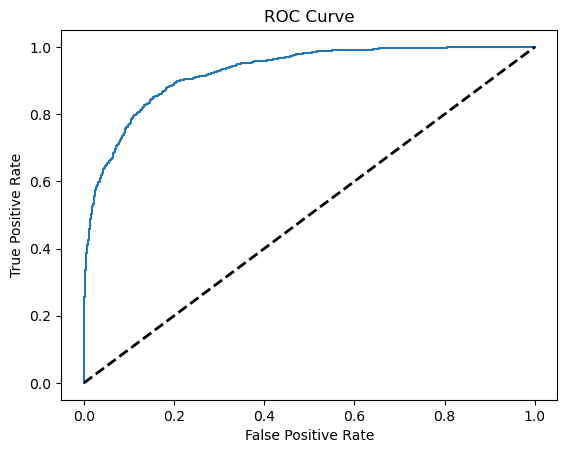

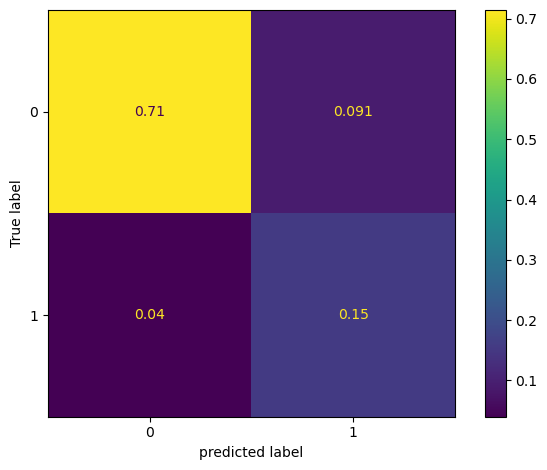

In [13]:
"""you should report in your report the confusion
matrix, ROC, AUC, macro F1 score, and accuracy for the best combination of hyperparameters
using 5-fold cross-validation"""
def create_pipe(clf):

    column_trans = ColumnTransformer(
            [('Text', TfidfVectorizer(ngram_range= (1,3),lowercase = True, max_df =0.9, min_df=0.01), 'cleaned_Text'),
             ('Text Length', MinMaxScaler(), ['len_Text'])],
            remainder='drop') 

    pipeline = Pipeline([('prep',column_trans),('clf', clf)])

    return pipeline

def fit_and_eval(pipeline, name):
    print("Tuning options:",pipeline.get_params().keys())
    param_grid={"clf__C": [10**i for i in range(-2,2)],
               #'clf__learning_rate':[0.8, 0.9, 1.0]
    } 
    
 
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1,n_jobs=-1, scoring='f1_macro')
    
    grid_search.fit(X_train, y_train)
    
    print("Best Parameters: ", grid_search.best_params_)
    for_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Mean F1 Macro"]),pd.DataFrame(grid_search.cv_results_["rank_test_score"], columns=["Ranks"])],axis=1)
    print(for_df)
    score_table = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["split0_test_score"], columns=["Test1"]),pd.DataFrame(grid_search.cv_results_["split1_test_score"], columns=["Test2"]),pd.DataFrame(grid_search.cv_results_["split2_test_score"], columns=["Test3"]),pd.DataFrame(grid_search.cv_results_["split3_test_score"], columns=["Test4"]),pd.DataFrame(grid_search.cv_results_["split4_test_score"], columns=["Test5"])],axis=1)
    print("Scores for Best Hyper: ")
    print(score_table)
    

    y_pred = grid_search.predict(X_test)
    print("-------------")
    print("Evaluation Report for ",name)
    
    print("Accuracy: ",accuracy_score(y_test, y_pred))
    
    print("F1 Macro Score: ",f1_score(y_test, y_pred,average="macro"))
    
    if name =="SVC":
        grid_search = CalibratedClassifierCV(grid_search.best_estimator_)
        grid_search.fit(X_train, y_train)
            
    ones = grid_search.predict_proba(X_test)[:, 1]
    print("AUC: ",roc_auc_score(y_test, ones))
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, ones)
    plt.plot(fpr,tpr)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.savefig(name+'ROC.png', bbox_inches='tight')
    
    print("Classification Report")
    print(metrics.classification_report(y_test, y_pred))

    print("Confusion Matrix")
    print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize ="all"))
    plt.savefig(name+'ROC.png', bbox_inches='tight')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('predicted label')
    plt.tight_layout()
    return grid_search
    
models = {'LogReg' : LogisticRegression(random_state=42, class_weight='balanced', max_iter=500),
            #'SVC': LinearSVC(random_state=42, class_weight='balanced',max_iter=2000)
          #'Ada': AdaBoostClassifier(random_state=42)
          #'RandomForest' : RandomForestClassifier(class_weight='balanced', random_state=42)  
          }
for name, model, in models.items():
    clf = model
    pipeline = create_pipe(clf)
    final = fit_and_eval(pipeline, name)
    


In [14]:
kaggle_test = pd.read_csv('Test.csv')
# predict the label of the test samples here using the model
# for this example we will simply predict all 0's

# Create text column that takes in all the text
kaggle_test['Text'] = kaggle_test['reviewText'] + ' ' + kaggle_test['summary']
kaggle_test['Text'] = kaggle_test['Text'].astype(str)
kaggle_test["cleaned_Text"] = kaggle_test["Text"].apply(text_processing)
# Create a new column that computes length of text
kaggle_test['len_Text'] = kaggle_test.apply(lambda row: len(row['Text']), axis = 1)
kaggle_test

test_predicted =  final.predict(kaggle_test[['cleaned_Text', 'len_Text']])
# IMPORTANT: use 'id' and 'predicted' as the column names
test_ids = list(kaggle_test.index) # the 'id' column name is the index of the test samples
test_submission = pd.DataFrame({'id':test_ids, 'predicted':test_predicted})
print(test_submission.shape) # should be (4500, 2)
test_submission.head()
test_submission.to_csv('test_submission_part_4.csv', index=False)

(4500, 2)


#### If you have time, try to tune more hyperparamters (for classfiers+vectorizers...etc), do data exploratory analysis and figure out what other features can be used ; so I used 2 features: text length and texts on their own. Is the reason why for Part 1 and Part 4 it trains better than others while for Part 2 and Part 3 it doesn't work as well?

In [15]:
# Make training and test sets 
X = q_train_data[['cleaned_Text', 'len_Text']]
Y = q_train_data["overall"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=53)

In [16]:
from sklearn.multiclass import OneVsRestClassifier
Multiclass_model =  OneVsRestClassifier(final)
#fit model
fitted = Multiclass_model.fit(X_train, y_train)
#make final predictions
y_pred = Multiclass_model.predict(X_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits


Accuracy:  0.5721137375813635
F1 Macro Score:  0.572307874885549
Confusion Matrix
AUC:  0.7332648387668288


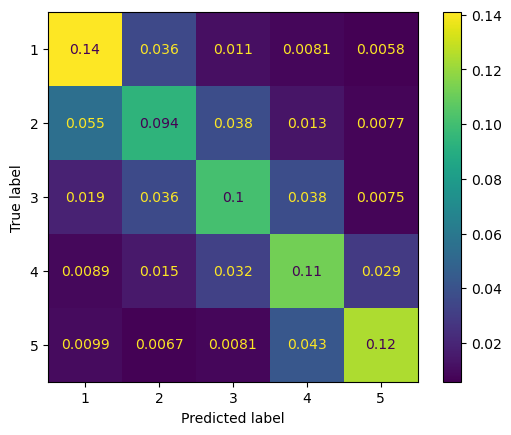

In [17]:
from sklearn.preprocessing import label_binarize
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("F1 Macro Score: ",f1_score(y_test, y_pred,average="macro"))


print("Confusion Matrix")
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize ="all"))

labels =[1, 2, 3, 4, 5]
#Binarize ytest with shape (n_samples, n_classes)
ytest = label_binarize(y_test, classes=labels)
#Binarize ypreds with shape (n_samples, n_classes)
ypred = label_binarize(y_pred, classes=labels)

print("AUC: ",roc_auc_score(ytest, ypred,average='macro',multi_class='ovr'))
    


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits


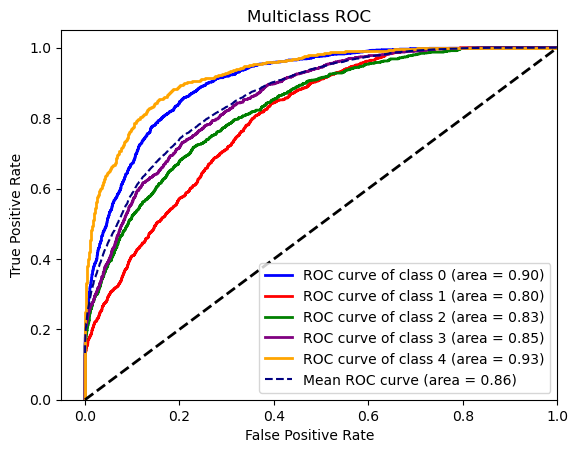

In [18]:
from itertools import cycle
from sklearn import metrics
import numpy as np

X = q_train_data[['cleaned_Text', 'len_Text']]
Y = q_train_data["overall"]

Y = label_binarize(Y, classes=[1, 2, 3, 4, 5])
n_classes = 5

# shuffle and split training and test sets
X_train, X_test, y_train, y_test =\
    train_test_split(X, Y, test_size=0.2, random_state=42)

# classifier
clf = OneVsRestClassifier(final)
y_score = clf.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Interpolate ROC curves
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

# Calculate mean AUC
mean_auc = metrics.auc(all_fpr, mean_tpr)

# Plot ROC curves for each class
colors = cycle(['blue', 'red', 'green','purple','orange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

# Plot mean ROC curve
plt.plot(all_fpr, mean_tpr, color='navy', linestyle='--',
         label='Mean ROC curve (area = {0:0.2f})'
         ''.format(mean_auc))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC')
plt.legend(loc="lower right")
plt.show()


In [19]:
kaggle_test = pd.read_csv('Test.csv')
# predict the label of the test samples here using the model
# for this example we will simply predict all 0's

# Create text column that takes in all the text
kaggle_test['Text'] = kaggle_test['reviewText'] + ' ' + kaggle_test['summary']
kaggle_test['Text'] = kaggle_test['Text'].astype(str)
kaggle_test["cleaned_Text"] = kaggle_test["Text"].apply(text_processing)
# Create a new column that computes length of text
kaggle_test['len_Text'] = kaggle_test.apply(lambda row: len(row['Text']), axis = 1)
kaggle_test

test_predicted =  Multiclass_model.predict(kaggle_test[['cleaned_Text', 'len_Text']])
# IMPORTANT: use 'id' and 'predicted' as the column names
test_ids = list(kaggle_test.index) # the 'id' column name is the index of the test samples
test_submission = pd.DataFrame({'id':test_ids, 'predicted':test_predicted})
print(test_submission.shape) # should be (4500, 2)
test_submission.head()
test_submission.to_csv('test_submission_part_5.csv', index=False)

(4500, 2)


#### K_mean Clustering

In [20]:
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score
kaggle_test = pd.read_csv('Test.csv')
# predict the label of the test samples here using the model
# for this example we will simply predict all 0's

# Create text column that takes in all the text
kaggle_test['Text'] = kaggle_test['reviewText'] + ' ' + kaggle_test['summary']
kaggle_test['Text'] = kaggle_test['Text'].astype(str)
kaggle_test["cleaned_Text"] = kaggle_test["Text"].apply(text_processing)

kaggle_test

,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style,category,Text,cleaned_Text
0,True,"07 23, 2015",28EA11D68FB7FF05B5ABB5989B0EDDD2,2CC19105CB9E7E4C30B1A399F3BFA181,B468F2974AA56619CF81B9DB66277892,ordered 318c and receive the 303c. my bad. i d...,Wrong filter,1437609600,NaN,NaN,NaN,automotive,ordered 318c and receive the 303c. my bad. i d...,ordered and receive the my bad didnt check unt...
1,True,"11 14, 2016",465EF4B95F3C23F3D2E0DF032806B593,44FF14695671384604654465F32F51BE,B9CBF62E157F0A8798A4D33BA089CE2B,slime must have a serious manufacturing defect...,Don't waste your time on the compressor lottery.,1479081600,6.0,NaN,NaN,automotive,slime must have a serious manufacturing defect...,slime must have serious manufacturing defect i...
2,True,"12 8, 2016",139CE33FEE21437434272524E638F60B,FD46962FBDA48B8BCB6BCCDE86515E83,68A0EDEBA61ACC7DD4096275BBFA6C8A,while the description says will not produce an...,Not error free in 2012 Mini Countryman S ALL4,1481155200,NaN,NaN,NaN,automotive,while the description says will not produce an...,while the description says will not produce an...
3,True,"06 16, 2016",5FAB0AEBEEF467F40843E12D1AD2176C,B602B679B1EDBD9C59BC91802E521324,5C6E597BBBCACE38B3335C3D02CB0522,"this keys could not start my truck, after cutt...","This keys could not start my truck, after cutt...",1466035200,NaN,NaN,{'Color:': ' Black'},automotive,"this keys could not start my truck, after cutt...",this keys could not start my truck after cutti...
4,False,"12 3, 2016",EEEFD48788F090F22767829BD219B24C,DA059E333E0AF68256582317DBEDA711,50DDC9EE6BA5B5E97F77CDC57CC32EFD,kept on trickle charger when the hd was not ri...,Kept on trickle charger when the HD was not ri...,1480723200,NaN,NaN,NaN,automotive,kept on trickle charger when the hd was not ri...,kept on trickle charger when the hd was not ri...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,True,"05 21, 2016",96229E77FBE5E282B1C28D480C4A7E9D,3D9B6884A0E19B6E98C4397E8AEC6969,471965BDE985724707CC087CE0E713FC,the name schleich speaks for itself.,Five Stars,1463788800,NaN,NaN,{'Product Packaging:': ' Standard Packaging'},toys,the name schleich speaks for itself. Five Stars,the name schleich speaks for itself five stars
4496,True,"12 22, 2014",010ED927C28962D8BCEF691AC3C2CF61,E5B78BCDC7C77E82F9200E8E876EF31F,557BB4EFC53486EFFC9C113FE2B1A9E7,was what i expected,Five Stars,1419206400,NaN,NaN,NaN,toys,was what i expected Five Stars,was what expected five stars
4497,True,"12 17, 2011",CB6E508974747F4052E87E8FAC4851AD,9DE6FD79FECA9146D5350C831A95AE07,4DEDB16F4FFA333ADEAA4CD80A46B4BD,my son loves it. every time it's in the playr...,Great,1324080000,NaN,NaN,{'Color:': ' Regular'},toys,my son loves it. every time it's in the playr...,my son loves it every time its in the playroom...
4498,True,"05 23, 2018",6554C955821D198A9A120131E0ABC9A4,90430F87881E42941D83893F647945A2,BCCA8B84B04D85C637DF6503D9227641,very cute. fits in car seat handle but is defi...,Five Stars,1527033600,NaN,NaN,NaN,toys,very cute. fits in car seat handle but is defi...,very cute fits in car seat handle but is defin...


In [46]:
tfidf = TfidfVectorizer(stop_words = "english",max_df=0.9,min_df=0.1,ngram_range=(1,1))
fit_features = tfidf.fit_transform(kaggle_test["reviewText"])

k_mod = KMeans(n_clusters=6, algorithm='auto',init='k-means++')
k_mod.fit(fit_features)

k_mod.predict(fit_features)
print("silhouette_score: ",silhouette_score(fit_features,k_mod.labels_))
print("random index: ", adjusted_rand_score(kaggle_test["category"],k_mod.labels_))

silhouette_score:  0.5997451777956766
random index:  0.010554899670482063


In [47]:
k_mod.inertia_

797.752721544007

In [23]:
# def create_pipe(clf):

#     column_trans = ColumnTransformer(
#             [('Text', TfidfVectorizer(ngram_range=(1,3), lowercase = True), 'cleaned_Text'),
#              ('Text Length', MinMaxScaler(), ['len_Text'])],
#             remainder='drop') 

#     pipeline = Pipeline([('prep',column_trans),
#                          ('clf', clf)])

#     return pipeline

# models = {'LogReg' : LogisticRegression(random_state=42, 
#                                         class_weight='balanced', 
#                                         max_iter=500),
#           #'Ada': AdaBoostClassifier()
#           #'RandomForest' : RandomForestClassifier(class_weight='balanced', random_state=42)
          
#           }

# for name, model, in models.items():
#     clf = model
#     pipeline = create_pipe(clf)
#     cv = RepeatedStratifiedKFold(n_splits=5, 
#                                  n_repeats=3, 
#                                  random_state=1)
#     %time scores = cross_validate(pipeline, X, Y, scoring=('roc_auc','f1_macro',"accuracy"), cv=cv, n_jobs=-1, error_score='raise')
#     print(name, ': roc_auc: %.3f and Mean f1 Macro: %.3f and Accuracy: %.3f' % \
#         (np.mean(scores['test_roc_auc']), np.mean(scores['test_f1_macro']),np.mean(scores['test_accuracy'])))
